In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tutoriel officiel de sympy (Symbolic Python)
https://docs.sympy.org/latest/tutorial/index.html

In [3]:
import sympy as sb
sb.init_printing() # Pour avoir de jolies formules mathématiques à l'écran
sb.__version__ # Version actuelle de sympy

'1.1.1'

## Introduction

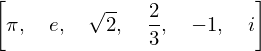

In [4]:
[sb.pi,sb.E,sb.sqrt(2),sb.Rational(2,3),sb.exp(sb.I*sb.pi),sb.exp(sb.Rational(1,2)*sb.I*sb.pi)]

In [5]:
sb.pi.evalf(30)

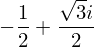

In [6]:
sb.cos(sb.Rational(2,3)*sb.pi)+sb.I*sb.sin(sb.Rational(2,3)*sb.pi)

### Définition de symboles (on n'est pas obligé de leur donner le même nom, mais c'est conseillé...) :

In [7]:
x,y,z,t = sb.symbols('x y z t')

### Définition de symboles avec typage

In [8]:
i,j,k = sb.symbols("i j k",integer=True)

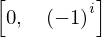

In [9]:
[sb.sin(i*sb.pi),sb.cos(i*sb.pi)]

In [10]:
j.is_integer

True

In [11]:
j.is_real

True

In [12]:
j.is_complex

True

In [13]:
[ n for n in dir(j) if n.startswith("is_") ]

['is_Add',
 'is_AlgebraicNumber',
 'is_Atom',
 'is_Boolean',
 'is_Derivative',
 'is_Dummy',
 'is_Equality',
 'is_Float',
 'is_Function',
 'is_Indexed',
 'is_Integer',
 'is_Matrix',
 'is_Mul',
 'is_Not',
 'is_Number',
 'is_NumberSymbol',
 'is_Order',
 'is_Piecewise',
 'is_Point',
 'is_Poly',
 'is_Pow',
 'is_Rational',
 'is_Relational',
 'is_Symbol',
 'is_Vector',
 'is_Wild',
 'is_algebraic',
 'is_algebraic_expr',
 'is_antihermitian',
 'is_commutative',
 'is_comparable',
 'is_complex',
 'is_composite',
 'is_constant',
 'is_even',
 'is_finite',
 'is_hermitian',
 'is_hypergeometric',
 'is_imaginary',
 'is_infinite',
 'is_integer',
 'is_irrational',
 'is_negative',
 'is_noninteger',
 'is_nonnegative',
 'is_nonpositive',
 'is_nonzero',
 'is_number',
 'is_odd',
 'is_polar',
 'is_polynomial',
 'is_positive',
 'is_prime',
 'is_rational',
 'is_rational_function',
 'is_real',
 'is_symbol',
 'is_transcendental',
 'is_zero']

### Comparaison de deux expressions : différence entre a == b et a.equals(b)

#### Manipulations algébriques de base

In [14]:
expr = sb.expand( (x+y+1)**3 );expr

In [15]:
fct = sb.factor(expr);fct

In [16]:
P_x=sb.collect(expr,x);P_x

In [17]:
[expr.coeff(x,n) for n in range(3,-1,-1)]

#### Identité parfaite des deux expressions (=== de Mathematica)

In [18]:
expr == fct

False

#### Comparaison deux expressions (== de Mathematica)

In [19]:
expr.equals(fct)

True

In [20]:
sb.exp(sb.Rational(2,3)*sb.I*sb.pi).equals(sb.Rational(1,2)*(-1+sb.sqrt(3)*sb.I))

True

In [21]:
sb.exp(sb.I*x).equals(sb.cos(x)+sb.I*sb.sin(x))

True

### Notation indicielle dans Jupyter

In [22]:
x_1,x_123,x_ij,x_ip1 = sb.symbols(["x_1","x_123","x_ij","x_i+1^*"]);(x_1,x_123,x_ij,x_ip1)

## 1. Dérivation, intégration

### 1.1 Primitive avec affectation immédiate

Calcul formel d'une primitive $\int\cos(x)\,\exp(x)\,\mathbb{d}x$ avec affectation immédiate

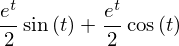

In [23]:
a = sb.integrate(sb.cos(x)*sb.exp(x),(x,t));a # Primitive : on intègre en x et la variable est nommée y

In [24]:
print(sb.integrate.__doc__[:604])

integrate(f, var, ...)

    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.

    var can be:

    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration


In [25]:
type(a)

sympy.core.add.Add

### 1.2 Primitive avec affectation différée

Calcul formel d'une primitive $\int\cos(x)\,\exp(x)\,\mathbb{d}x$ avec affectation différée

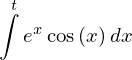

In [26]:
b = sb.Integral(sb.cos(x)*sb.exp(x),(x,t));b # Primitive : on intègre en x et la variable est nommée y

In [27]:
print(sb.Integral.__doc__)

Represents unevaluated integral.


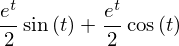

In [28]:
c = b.doit();c # Calcul de l'expression b

In [29]:
a == c

True

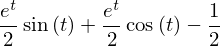

In [30]:
sb.integrate(sb.cos(x)*sb.exp(x),(x,0,t))

### 1.3 Dérivation

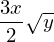

In [31]:
sb.diff(x*y*sb.sqrt(y),y)

In [32]:
print(sb.diff.__doc__[:581])


    Differentiate f with respect to symbols.

    This is just a wrapper to unify .diff() and the Derivative class; its
    interface is similar to that of integrate().  You can use the same
    shortcuts for multiple variables as with Derivative.  For example,
    diff(f(x), x, x, x) and diff(f(x), x, 3) both return the third derivative
    of f(x).

    You can pass evaluate=False to get an unevaluated Derivative class.  Note
    that if there are 0 symbols (such as diff(f(x), x, 0), then the result will
    be the function (the zeroth derivative), even if evaluate=False.


In [33]:
sb.diff((x-2*y)**10,x,x,y)

#### Affectation différée 

In [34]:
d = sb.diff(x*y*sb.sqrt(y),y,evaluate=False)

In [35]:
print(d)

Derivative(x*y**(3/2), y)


In [36]:
type(d)

sympy.core.function.Derivative

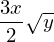

In [37]:
d.doit()

#### Dérivée d'une fonction non encore définie

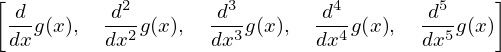

In [38]:
g = sb.Function("g")
[g(x).diff(x,n) for n in range(1,6)]

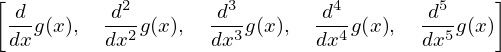

In [39]:
[sb.Derivative(g(x),x,n) for n in range(1,6)]

### 1.4 Limites

In [40]:
sb.limit(sb.sin(x)/x,x,0)

In [41]:
(sb.sin(sb.pi*x)/(sb.pi*x)).limit(x,0) # Variante

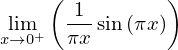

In [42]:
lim_sinc = sb.Limit(sb.sin(sb.pi*x)/(sb.pi*x),x,0) ; lim_sinc  # Par défaut, limite par valeurs supérieures

In [43]:
lim_sinc.doit()

In [44]:
sb.limit(abs(x)/x,x,0) # Confirmation de la limite par valeurs supérieures par défaut

In [45]:
sb.limit(abs(x)/x,x,0,"-") # Limite par valeur inférieure

### 1.5 Développements limités

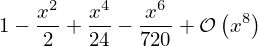

In [46]:
sb.cos(x).series(x,0,8)

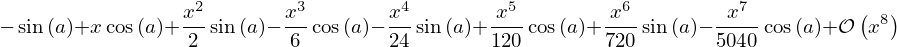

In [47]:
a = sb.Symbol("a")
sb.sin(x-a).series(x,0,8)

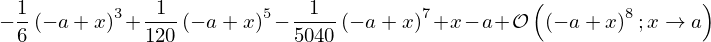

In [48]:
sb.sin(x-a).series(x,a,8)

### 1.6 Formules de différences finies

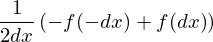

In [49]:
f = sb.Function("f") ; dx = sb.symbols("dx")
(f(x).diff(x)).as_finite_difference([-dx,0,dx],0).simplify()

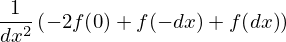

In [50]:
(f(x).diff(x,2)).as_finite_difference([-dx,0,dx],0).simplify()

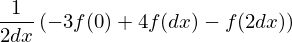

In [51]:
(f(x).diff(x,1)).as_finite_difference([0,dx,2*dx],0).simplify()

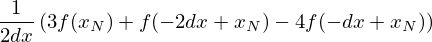

In [52]:
x_N = sb.symbols("x_N")
(f(x).diff(x,1)).as_finite_difference([x_N,x_N-dx,x_N-2*dx],x_N).simplify()

## 2. Substitution et évaluation numérique

### 2.1 Substition

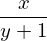

In [53]:
frac = (x/(y+1));frac

In [54]:
print(frac.subs.__doc__[:946])


        Substitutes old for new in an expression after sympifying args.

        `args` is either:
          - two arguments, e.g. foo.subs(old, new)
          - one iterable argument, e.g. foo.subs(iterable). The iterable may be
             o an iterable container with (old, new) pairs. In this case the
               replacements are processed in the order given with successive
               patterns possibly affecting replacements already made.
             o a dict or set whose key/value items correspond to old/new pairs.
               In this case the old/new pairs will be sorted by op count and in
               case of a tie, by number of args and the default_sort_key. The
               resulting sorted list is then processed as an iterable container
               (see previous).

        If the keyword ``simultaneous`` is True, the subexpressions will not be
        evaluated until all the substitutions have been made.


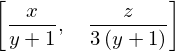

In [55]:
[frac,frac.subs(x,z/3)]

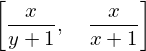

In [56]:
[frac,frac.subs({x:y,y:x})] # Ne marche pas...

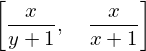

In [57]:
[frac,frac.subs( ((x,y),(y,x)), simulaneous=True)] # Ne marche toujours pas...

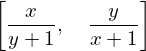

In [58]:
temp = sb.symbols('temp');[frac,frac.subs(((x,temp),(y,x),(temp,y)))] # Il faut passer par un symbole intermédiaire

### 2.2 Évaluation numérique 

In [59]:
pi_num = sb.pi.evalf(30);pi_num

In [60]:
type(pi_num)

sympy.core.numbers.Float

In [61]:
sb.sin(pi_num)

In [62]:
sb.sin(pi_num).evalf(chop=True)

### 2.3 Conversion d'une expression en fonction numérique

In [63]:
cos_vec = sb.lambdify(x,sb.cos(x),np)

In [64]:
cos_vec

<function numpy.<lambda>(_Dummy_321)>

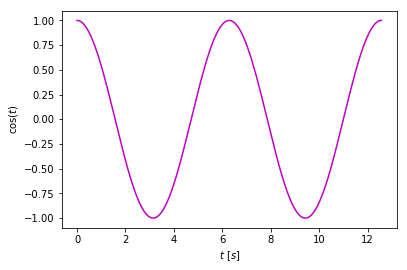

In [65]:
X = np.linspace(0,4*np.pi,1001) ; Y = cos_vec(X) ; plt.plot(X,Y,"m-") ;
plt.xlabel(r"$t$ $[s]$");plt.ylabel(r"$\cos(t)$");plt.show()

## 3. Manipulation algébrique d'expressions

### 3.1 Polynômes

In [66]:
Q = x**2 - 3*y*x + 2*(x-3) -4*y;Q

In [67]:
Q.collect(x)

In [68]:
Q.collect(y)

In [69]:
Q.coeff(x,1)

In [70]:
Q.coeff(x*y,1)

In [71]:
R = z**4-1;R.factor()

In [72]:
R.factor(extension=sb.I)

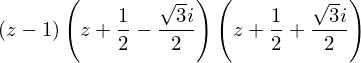

In [73]:
R = z**3-1;R.factor(extension=(sb.I,sb.sqrt(3)))

### 3.2 Fractions rationnelles

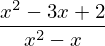

In [74]:
F = (x**2-3*x+2)/(x**2-x);F

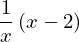

In [75]:
G = F.cancel() ; G

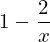

In [76]:
G.apart(x)

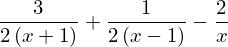

In [77]:
(G/(1-x**2)).apart(x)

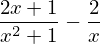

In [78]:
(G/(1+x**2)).apart(x)

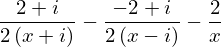

In [79]:
(G/(1+x**2)).apart(x,extension=sb.I)

### 3.3 Expressions trigonométriques

Sur le cas-test élémentaire ci-dessous, cela ne marche pas bien

In [80]:
[ a for a in dir(sb) if "trig" in a ]

['expand_trig', 'exptrigsimp', 'trigamma', 'trigonometry', 'trigsimp']

In [81]:
trigo = sb.cos(4*x)+sb.sin(3*x)*sb.sin(x) ; trigo

In [82]:
trigo.trigsimp() # pas terrible...

In [83]:
resultat = trigo.equals(sb.cos(3*x)*sb.cos(x))  # Ne renvoie rien ! bogue ?
type(resultat)

NoneType

In [84]:
(a).equals(a+1-1) # et  pourtant...

True

In [85]:
(trigo-sb.cos(3*x)*sb.cos(x)).simplify()

In [86]:
sb.expand_trig(trigo-sb.cos(3*x)*sb.cos(x)).expand().trigsimp()  # ouf !!!

In [87]:
solutions = sb.solveset(sb.Eq(trigo,sb.cos(3*x)*sb.cos(x)),x)
solutions

In [88]:
solutions.condition.trigsimp()

### 3.4 Expressions avec des puissances

In [89]:
[ a for a in dir(sb) if "pow" in a ]

['expand_power_base',
 'expand_power_exp',
 'is_nthpow_residue',
 'nth_power_roots_poly',
 'perfect_power',
 'powdenest',
 'power',
 'powsimp']

In [90]:
sb.powsimp(x**i*y**i)  # Rappel : i est entier

In [91]:
sb.powsimp(x**z*y**z)

In [92]:
sb.powsimp(x**z*y**z,force=True) # On force la simplification, sachant que cela peut ne pas être vrai...

## 4. Équations algébriques

### Citations du tutoriel

« Il est recommandé d'utiliser **solveset** et non pas **solve**. » 

« Il est recommandé de donner une expression ou une liste d'expressions à annuler plûtot que des équations. » 

### 4.1 Exemples

In [93]:
sb.solveset(sb.Eq(x,x-1),x)

In [94]:
sb.solveset(sb.Eq(x,x),x)

In [95]:
sb.solveset(sb.Eq(x,x),x,domain=sb.S.Reals)

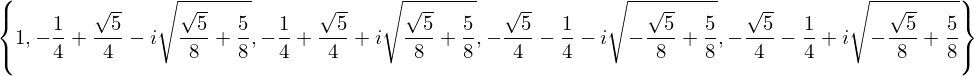

In [96]:
sb.solveset(z**5-1,z,domain=sb.S.Complexes)

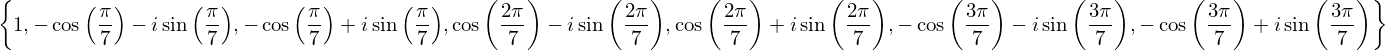

In [97]:
sb.solveset(z**7-1,z,domain=sb.S.Complexes)

In [98]:
sb.solveset(x**2-1,x) # Ensemble des solutions

In [99]:
sb.solveset(x**2<1,x,domain=sb.S.Reals) # Intervalle ouvert

In [100]:
sb.solveset(x**2<=1,x,domain=sb.S.Reals) # Intervalle fermé

#### <span style="color:red">Attention</span> : on n'a pas l'ordre de multiplicité des racines ! 

In [101]:
sb.solveset(x**3-x**5,x) # Ensemble des solutions

In [102]:
sb.solveset(sb.sin(x),x,domain=sb.S.Reals)

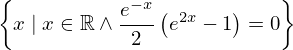

In [103]:
sb.solveset(sb.sinh(x),x)

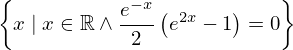

In [104]:
sb.solveset(sb.sinh(x),x,domain=sb.S.Complexes) # Peut mieux faire...

### 4.2 Exemple d'équation polynomiale à solutions triviales

In [105]:
equation = sb.Eq((z-3)**10,2)

In [106]:
sol = list(sb.solveset(equation,z,domain=sb.S.Complexes)) ; sol  # résultat pas terrible...

In [107]:
np.array([ s.evalf() for s in sol ])

array([1.92822653746371, 4.07177346253629,
       2.13291705468806 - 0.629972635077273*I,
       2.13291705468806 + 0.629972635077273*I,
       2.6688037859562 - 1.01931713553736*I,
       2.6688037859562 + 1.01931713553736*I,
       3.3311962140438 - 1.01931713553736*I,
       3.3311962140438 + 1.01931713553736*I,
       3.86708294531194 - 0.629972635077273*I,
       3.86708294531194 + 0.629972635077273*I], dtype=object)

In [108]:
V = np.array(sol).astype(np.complex);V

array([1.92822654+0.j        , 4.07177346+0.j        ,
       2.13291705-0.62997264j, 2.13291705+0.62997264j,
       2.66880379-1.01931714j, 2.66880379+1.01931714j,
       3.33119621-1.01931714j, 3.33119621+1.01931714j,
       3.86708295-0.62997264j, 3.86708295+0.62997264j])

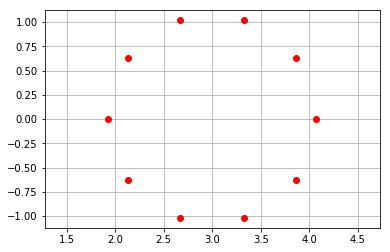

In [109]:
plt.plot(V.real,V.imag,"or"); plt.grid();plt.axis("equal");plt.show()

## 5. Problèmes différentiels

### 5.1 Équation différentielle ordinaire sans condition initiale

In [110]:
f = sb.Function("f") ; # Fonction inconnue
a,b,c = sb.symbols(["a","b","c"],real=True,positive=True) # Paramètres positifs

In [111]:
sol_gen=sb.dsolve(sb.Eq(f(x).diff(x,2)+a*f(x),0),f(x)) ; sol_gen

### <span style="color:red">Pas de condition initiale dans la version 1.1.1 !</span> (prévu pour la 1.2)

In [112]:
repr(sol_gen)

'Eq(f(x), C1*sin(sqrt(a)*x) + C2*cos(sqrt(a)*x))'

In [113]:
f_rule = sb.solve([sol_gen],[f(x)]) ; f_rule

In [114]:
eq_ics = [sb.Eq(f(x).subs(f_rule).subs(x,0),b),
          sb.Eq(f(x).subs(f_rule).diff(x).subs(x,0),c)] # ics abréviation de Initial Conditions
eq_ics

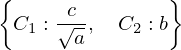

In [115]:
sol_ics = sb.solve(eq_ics,["C1","C2"]) ; sol_ics

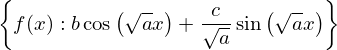

In [116]:
{k:v.subs(sol_ics) for k,v in f_rule.items()}

### 5.2 Système différentiel ordinaire

### 5.2.1 Système sans conditions initiales

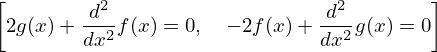

In [117]:
g = sb.Function("g")
SDO = [sb.Eq(f(x).diff(x,2)+2*g(x),0),sb.Eq(g(x).diff(x,2)-2*f(x),0)]
SDO

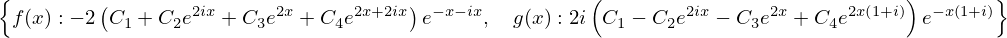

In [118]:
sol_SDO = sb.solve(sb.dsolve(SDO,[f(x),g(x)]),[f(x),g(x)]) ; sol_SDO

### 5.2.2 Calcul de la solution pour des conditions initiales données

In [119]:
sys_ics = [ sb.Eq(c.subs(sol_SDO).diff(x,d).subs(x,0),v) \
           for c,d,v in zip([f(x),f(x),g(x),g(x)],[0,1,0,1],[0,1,0,0]) ]
sys_ics

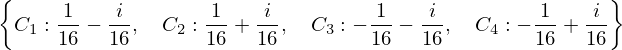

In [120]:
sol_ics = sb.solve(sys_ics,["C1","C2","C3","C4"])
sol_ics

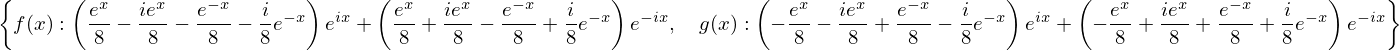

In [121]:
sol_avec_ics = { k:v.subs(sol_ics).expand().collect([sb.exp(sb.I*x),sb.exp(-sb.I*x)]) for k,v in sol_SDO.items() }
sol_avec_ics

### 5.2.3 Simplification algébrique « technique » pour avoir une formulation dans $\mathbb{R}$

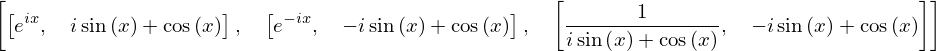

In [122]:
exp_to_trig = [[sb.exp(sb.I*x),sb.cos(x)+sb.I*sb.sin(x)],[sb.exp(-sb.I*x),sb.cos(x)-sb.I*sb.sin(x)],\
               [1/(sb.cos(x)+sb.I*sb.sin(x)),sb.cos(x)-sb.I*sb.sin(x)]]
exp_to_trig

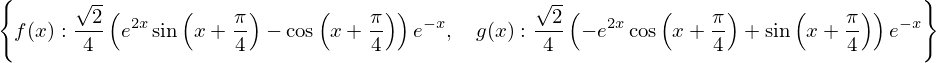

In [123]:
{ k:v.subs(exp_to_trig).expand().simplify() for k,v in sol_avec_ics.items() }

## 6. Calcul matriciel

<span style = "font-family:Courier New">**sympy.Matrix**</span> ressemble à <span style = "font-family:Courier New">**numpy.array**</span>, mais il y a des différences significatives.

### 6.1 Vecteurs et matrices

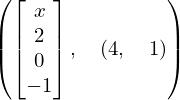

In [124]:
V = [x,2,0,-1] # Un vecteur est une liste simple
MC = sb.Matrix(V); MC,MC.shape  # Beurk : confusion vecteur et matrice-colonne

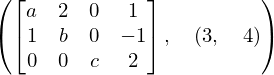

In [125]:
M = sb.Matrix([[a,2,0,1],[1,b,0,-1],[0,0,c,2]]) ; M,M.shape

In [126]:
repr(M)

'Matrix([\n[a, 2, 0,  1],\n[1, b, 0, -1],\n[0, 0, c,  2]])'

In [127]:
M.rows

In [128]:
M.cols

In [129]:
M.dot(V)  #  Attention : produit « matrice par vecteur » uniquement

In [130]:
help(M.dot)

Help on method dot in module sympy.matrices.matrices:

dot(b) method of sympy.matrices.dense.MutableDenseMatrix instance
    Return the dot product of Matrix self and b relaxing the condition
    of compatible dimensions: if either the number of rows or columns are
    the same as the length of b then the dot product is returned. If self
    is a row or column vector, a scalar is returned. Otherwise, a list
    of results is returned (and in that case the number of columns in self
    must match the length of b).
    
    Examples
    
    >>> from sympy import Matrix
    >>> M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    >>> v = [1, 1, 1]
    >>> M.row(0).dot(v)
    6
    >>> M.col(0).dot(v)
    12
    >>> M.dot(v)
    [6, 15, 24]
    
    See Also
    
    cross
    multiply
    multiply_elementwise



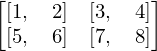

In [131]:
T = sb.Matrix([[[1,2],[3,4]],[[5,6],[7,8]]]) ; T

In [132]:
T.shape # Matrice de couples et non pas tableau à 3 indices

### 6.2 Une matrice est un objet mutable

#### 6.2.1 Suppression de ligne, de colonne (en place)

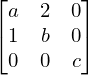

In [133]:
R = M.copy() ; R.col_del(-1) # en place
R

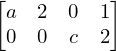

In [134]:
R = M.copy() ; R.row_del(1)
R

#### 6.2.2 Ajout de ligne, de colonne (nouvel objet)

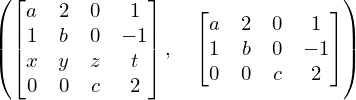

In [135]:
R = M.row_insert(2,sb.Matrix([[x,y,z,t]])) ; (R,M)

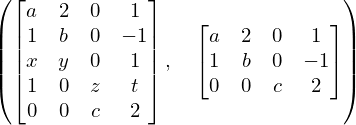

In [136]:
R = M.row_insert(2,sb.Matrix([[x,y,0,1],[1,0,z,t]])) ; (R,M)

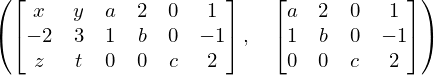

In [137]:
R = M.col_insert(0,sb.Matrix([[x,y],[-2,3],[z,t]])) ; (R,M)

### 6.3 Générateurs

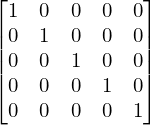

In [138]:
I5 = sb.eye(5) ; I5

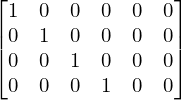

In [139]:
sb.eye(4,6)

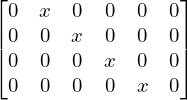

In [140]:
x*sb.Matrix(np.eye(4,6,k=1,dtype=np.int)) # l'option k n'existe pas dans sympy.eye

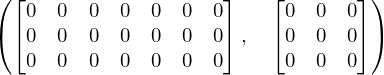

In [141]:
sb.zeros(3,7),sb.zeros(3)

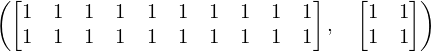

In [142]:
sb.ones(2,10),sb.ones(2)

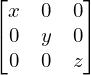

In [143]:
sb.diag(x,y,z)

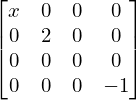

In [144]:
sb.diag(*V)  # Attention !  sb.diag(V) ne donne pas le résultat attendu

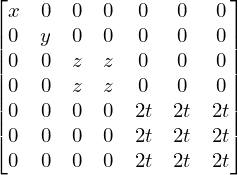

In [145]:
big_M = sb.diag(x,y,z*sb.ones(2),2*t*sb.ones(3)) ; big_M

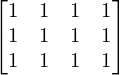

In [146]:
sb.Matrix(np.ones_like(M))

### 6.4 Opérations de base

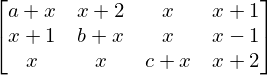

In [147]:
M + x*sb.Matrix(np.ones_like(M))  # M + x n'est pas accepté

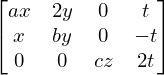

In [148]:
M*sb.diag(x,y,z,t)  # Attention : produit matriciel

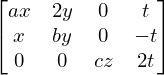

In [149]:
M@sb.diag(x,y,z,t) # Fonctionne aussi

<span style=color:red>**Ne fonctionne pas**</span> : <span style="font-family:Courier New">**M.dot(sb.diag(x,y,z,t))**</span>. Utiliser <span style="font-family:Courier New">**multiply**</span> à la place :

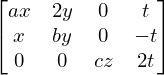

In [150]:
M.multiply(sb.diag(x,y,z,t))

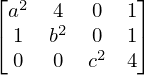

In [151]:
M.multiply_elementwise(M)  #  Multiplication terme-à-terme. M**2 ne fonctionne pas !

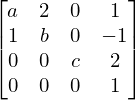

In [152]:
Q = M.row_insert(4,sb.Matrix([[0,0,0,1]])) ; Q

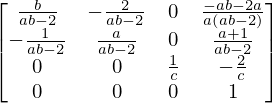

In [153]:
Q**-1  # La méthode inverse n'existe pas !

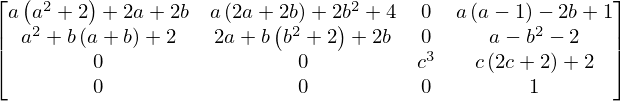

In [154]:
Q**3

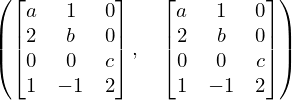

In [155]:
M.transpose(),M.T  # comme avec les numpy.ndarray

In [156]:
Q.det()  # Déterminant

In [157]:
M.rank() 

In [158]:
Q.rank() 

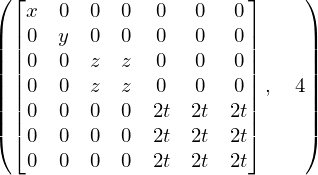

In [159]:
big_M,big_M.rank()

### 6.5 Forme échelonnée

<span style = color:blue>**r**</span>educed <span style = color:blue>**r**</span>ow <span style = color:blue>**e**</span>chelon <span style = color:blue>**f**</span>orm

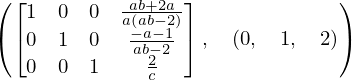

In [160]:
M.rref()

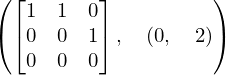

In [161]:
T = sb.Matrix([[x,x,0],[y,y,y],[z,z,0]]) 
T.rref()

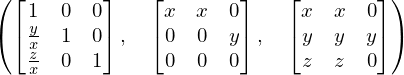

In [162]:
TL,TU,_ = T.LUdecomposition()
TL,TU,TL@TU

### 6.6 Noyau de l'application linéaire associée à la matrice

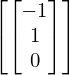

In [163]:
KerT = T.nullspace() ; KerT

In [164]:
T.rows

In [165]:
[ (T@u).equals(sb.zeros(T.rows,1)) for u in KerT]

[True]

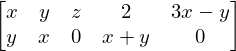

In [166]:
P = sb.Matrix([[x,y,z,2,3*x-y],[y,x,0,x+y,0]]) ; P

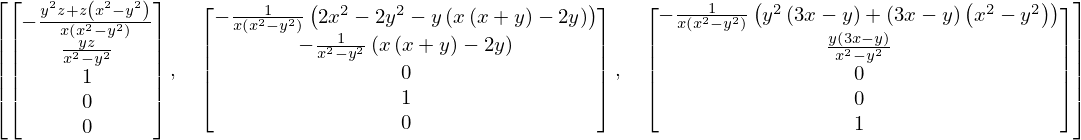

In [167]:
KerP = P.nullspace() ; KerP

In [168]:
[ (P@u).equals(sb.zeros(P.rows,1)) for u in KerP]

[True, True, True]